In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter

In [2]:
markers = ['o', 's', '+', '^', '.', '*']
LEGEND_SIZE=15
LABEL_SIZE=18
TICK_SIZE=15
FIG_W_SIZE=6
FIG_H_SIZE=3
META_WIDTH = 5
y_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
META_YLIM=(1,2000000)
META_WIDTH = 5

In [3]:
df = pd.read_csv('data/meta2_trigger_hotel_blueprint_22000_75.csv')

In [4]:
start_file = open('data/meta2_trigger_start_22000_75.txt')
start_time = int(start_file.read())
duration = 25
anomaly_file = open('data/meta2_ts_22000_25_75.txt')
trigger_start_ns = int(anomaly_file.read())
anomaly_file.close()
trigger_start_rel = (trigger_start_ns - start_time) / 1e9
trigger_end_rel = trigger_start_rel + duration

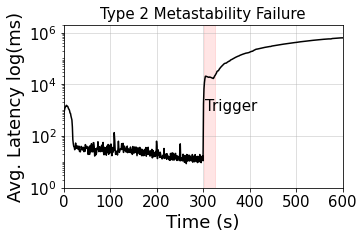

In [5]:
fig,ax = plt.subplots(figsize=(META_WIDTH,FIG_H_SIZE))
ax.set_ylim(*META_YLIM)
ax.set_yscale('log')
#ax.set_yticklabels([])

ax.grid(visible=True, which='major', axis='both', alpha=0.5)

ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_xlabel("Time (s)", fontsize=LABEL_SIZE)
ax.set_ylabel("Avg. Latency log(ms)",fontsize=LABEL_SIZE)
ax.plot(df['start_rel'], df['Duration']/1e6, label="latency", color="black")
ax.axvspan(trigger_start_rel, trigger_end_rel, color="red", alpha=0.1)
ax.text(305, 1000, "Trigger", fontsize=LEGEND_SIZE)
ax.tick_params(labelsize=TICK_SIZE)
plt.margins(x=0,y=0)
plt.title('Type 2 Metastability Failure', fontsize=LEGEND_SIZE)
fig.savefig('meta2.png', bbox_inches='tight',dpi=1200)
plt.show()